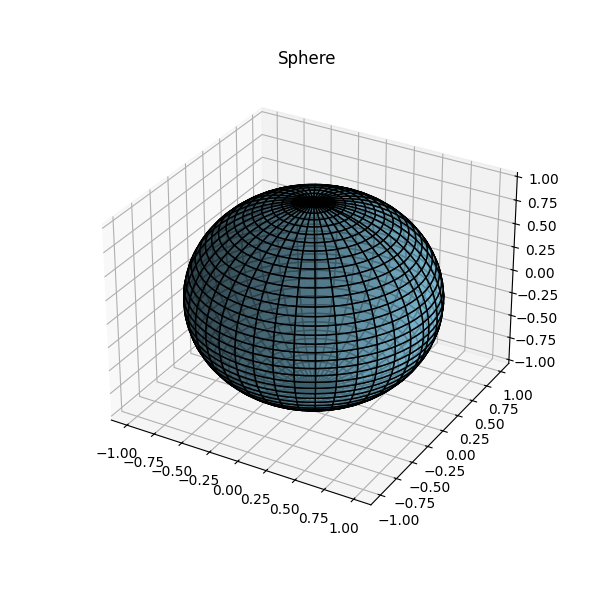

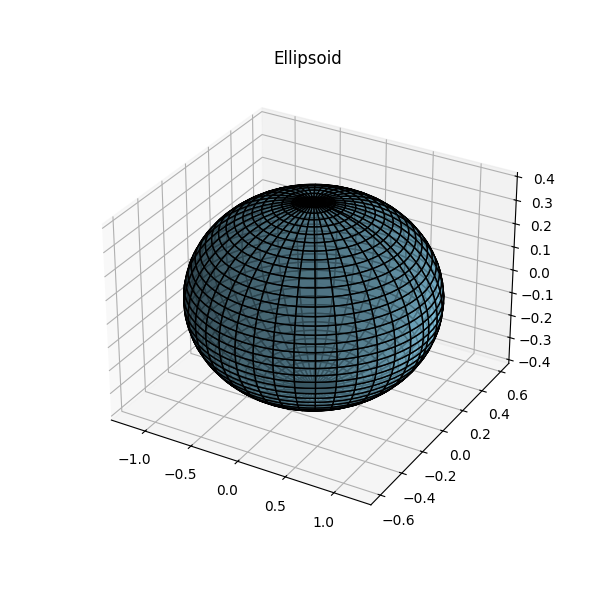

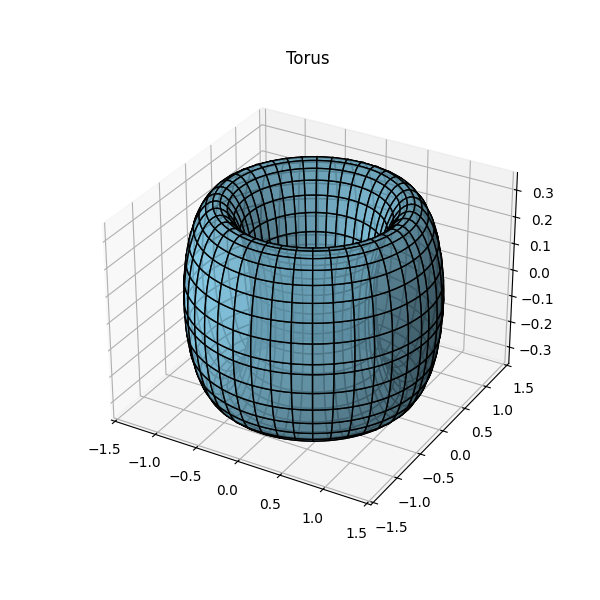

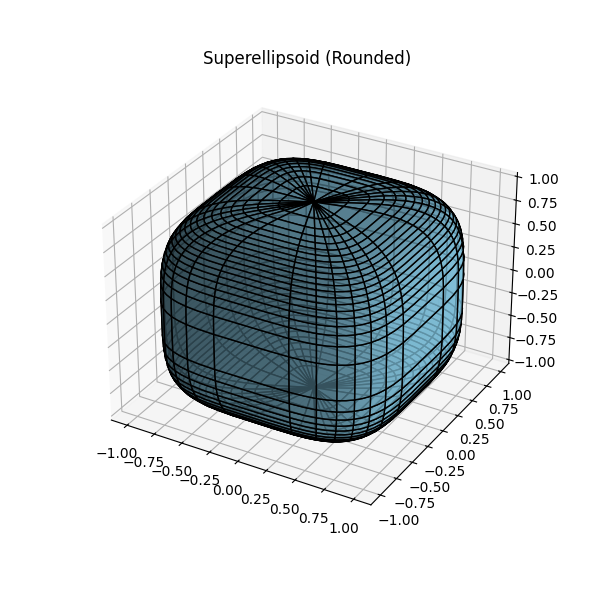

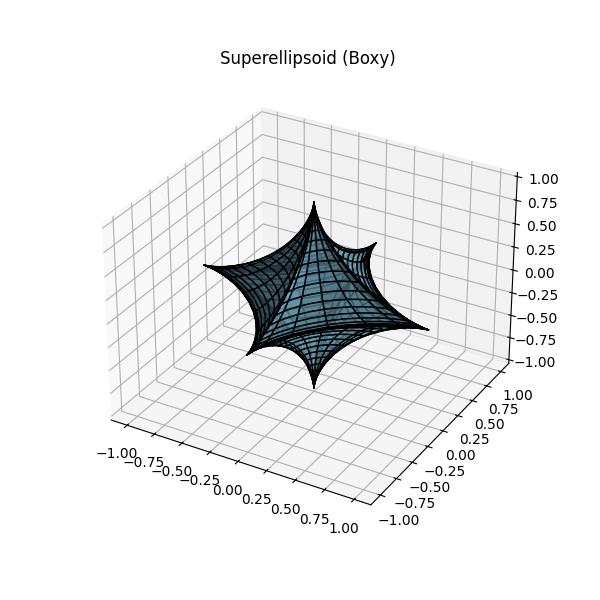

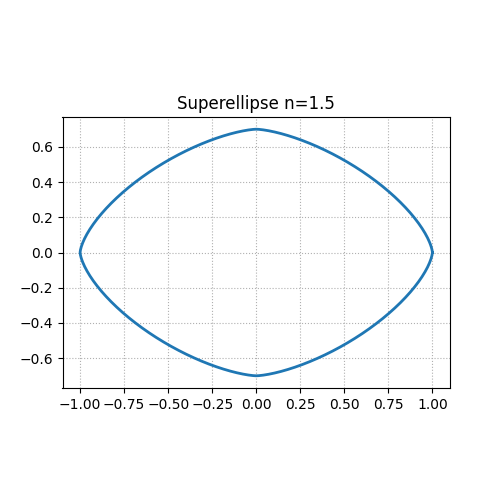

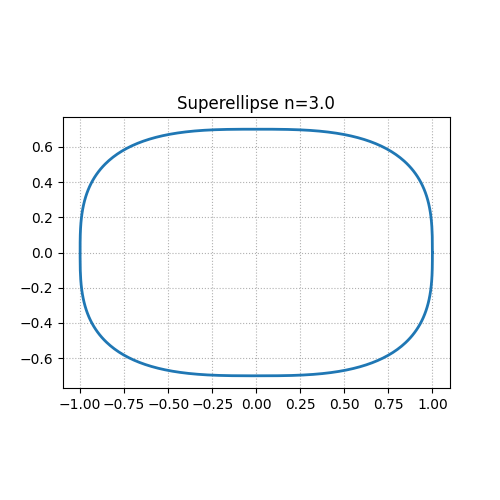

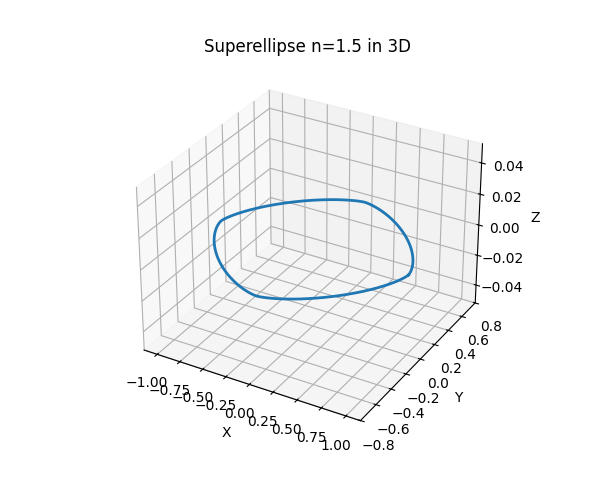

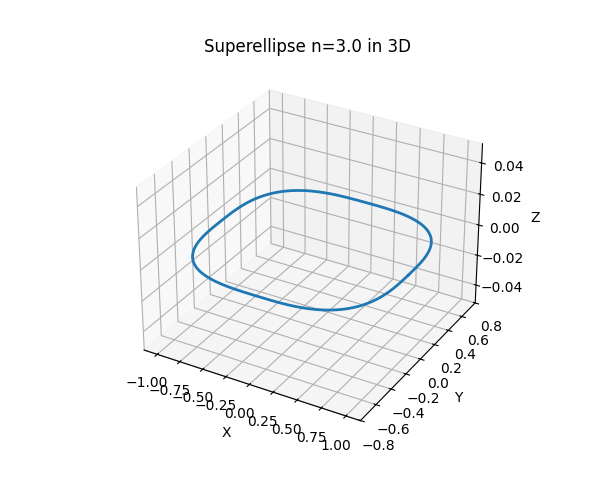

In [1]:
#  Setup 
# Install ipympl if not already
# !pip install ipympl numpy matplotlib

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pow_abs(x, p):
    return np.sign(x) * (np.abs(x) ** p)


def sphere(radius=1.0, u_res=80, v_res=40):
    u = np.linspace(0, 2*np.pi, u_res)
    v = np.linspace(0, np.pi, v_res)
    u, v = np.meshgrid(u, v)
    x = radius * np.cos(u) * np.sin(v)
    y = radius * np.sin(u) * np.sin(v)
    z = radius * np.cos(v)
    return x, y, z

def ellipsoid(a=1.0, b=0.6, c=0.4, u_res=80, v_res=40):
    u = np.linspace(0, 2*np.pi, u_res)
    v = np.linspace(0, np.pi, v_res)
    u, v = np.meshgrid(u, v)
    x = a * np.cos(u) * np.sin(v)
    y = b * np.sin(u) * np.sin(v)
    z = c * np.cos(v)
    return x, y, z

def torus(R=1.0, r=0.3, u_res=120, v_res=60):
    u = np.linspace(0, 2*np.pi, u_res)
    v = np.linspace(0, 2*np.pi, v_res)
    u, v = np.meshgrid(u, v)
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return x, y, z

def superellipsoid(a=1.0, b=1.0, c=1.0, e1=1.0, e2=1.0, u_res=120, v_res=60):
    u = np.linspace(-np.pi/2, np.pi/2, u_res)
    v = np.linspace(-np.pi, np.pi, v_res)
    u, v = np.meshgrid(u, v)
    cu = np.cos(u); su = np.sin(u)
    cv = np.cos(v); sv = np.sin(v)
    x = a * pow_abs(cu, e1) * pow_abs(cv, e2)
    y = b * pow_abs(cu, e1) * pow_abs(sv, e2)
    z = c * pow_abs(su, e1)
    return x, y, z

def superellipse_2d(a=1.0, b=1.0, n=2.5, t_res=400):
    """
    2D Superellipse (Lamé curve): (|x/a|)^n + (|y/b|)^n = 1
    """
    t = np.linspace(0, 2*np.pi, t_res)
    ct = np.cos(t)
    st = np.sin(t)
    x = a * pow_abs(ct, 2.0 / n)
    y = b * pow_abs(st, 2.0 / n)
    return x, y


# ----------------------------- Plot Functions -----------------------------
def plot_3d_surface(X, Y, Z, title):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='skyblue', edgecolor='k', alpha=0.8)
    ax.set_title(title)
    plt.show()

def plot_2d_curve(X, Y, title):
    plt.figure(figsize=(5,5))
    plt.plot(X, Y, linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.grid(True, linestyle=':')
    plt.show()
    

def plot_3d_curve(x, y, z=0, title='3D Curve'):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')
    z_array = np.full_like(x, z)  # make z all zeros
    ax.plot(x, y, z_array, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    plt.show()


# ----------------------------- Display All Shapes -----------------------------
# Sphere
X, Y, Z = sphere()
plot_3d_surface(X, Y, Z, 'Sphere')

# Ellipsoid
X, Y, Z = ellipsoid(a=1.2, b=0.6, c=0.4)
plot_3d_surface(X, Y, Z, 'Ellipsoid')

# Torus
X, Y, Z = torus(R=1.0, r=0.35)
plot_3d_surface(X, Y, Z, 'Torus')

# Superellipsoid
X, Y, Z = superellipsoid(a=1, b=1, c=1, e1=0.5, e2=0.5)
plot_3d_surface(X, Y, Z, 'Superellipsoid (Rounded)')

X, Y, Z = superellipsoid(a=1, b=1, c=1, e1=3.0, e2=3.0)
plot_3d_surface(X, Y, Z, 'Superellipsoid (Boxy)')

# Superellipse 2D
x2, y2 = superellipse_2d(a=1.0, b=0.7, n=1.5)
plot_2d_curve(x2, y2, 'Superellipse n=1.5')

x2, y2 = superellipse_2d(a=1.0, b=0.7, n=3.0)
plot_2d_curve(x2, y2, 'Superellipse n=3.0')

# Example: Superellipse in 3D
x2, y2 = superellipse_2d(a=1.0, b=0.7, n=1.5)
plot_3d_curve(x2, y2, z=0, title='Superellipse n=1.5 in 3D')

x2, y2 = superellipse_2d(a=1.0, b=0.7, n=3.0)
plot_3d_curve(x2, y2, z=0, title='Superellipse n=3.0 in 3D')
